<a href="https://colab.research.google.com/github/Anastasiang/BrendaINSE6220/blob/main/myconcordiaBrendaaAnastasia/INSE6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)


Pandas version:  2.1.4
Seaborn version:  0.13.2


In [ ]:
#read cvs file into dataframe
df = pd.read_csv('WineQT.csv')
#df = pd.read_csv('WineQT.csv')
df.head(25)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             6.7             0.580         0.08             1.8      0.097   
10            5.6             0.615         0.00             1.6      0.089   
11            7.8             0.610         0.29             1.6      0.114   
12            8.5             0.280         0.56             1.8      0.092   
13            7.9             0.320         0.51             1.8      0.341   
14            7.6             0.390         0.31             2.3      0.082   
15            7.9             0.430         0.21             1.6      0.106   
16            8.5             0.490         0.11             2.3      0.084   
17            6.9             0.400         0.14             2.4      0.085   
18            6.3             0.390         0.16             1.4      0.080   
19            7.6             0.410         0.24             1.8      0.080   
20            7.1             0.710         0.00             1.9      0.080   
21            7.8             0.645         0.00             2.0      0.082   
22            6.7             0.675         0.07             2.4      0.089   
23            8.3             0.655         0.12             2.3      0.083   
24            5.2             0.320         0.25             1.8      0.103   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  15.0                  65.0   0.9959  3.28       0.54   
10                 16.0                  59.0   0.9943  3.58       0.52   
11                  9.0                  29.0   0.9974  3.26       1.56   
12                 35.0                 103.0   0.9969  3.30       0.75   
13                 17.0                  56.0   0.9969  3.04       1.08   
14                 23.0                  71.0   0.9982  3.52       0.65   
15                 10.0                  37.0   0.9966  3.17       0.91   
16                  9.0                  67.0   0.9968  3.17       0.53   
17                 21.0                  40.0   0.9968  3.43       0.63   
18                 11.0                  23.0   0.9955  3.34       0.56   
19                  4.0                  11.0   0.9962  3.28       0.59   
20                 14.0                  35.0   0.9972  3.47       0.55   
21                  8.0                  16.0   0.9964  3.38       0.59   
22                 17.0                  82.0   0.9958  3.35       0.54   
23                 15.0                 113.0   0.9966  3.17       0.66   
24                 13.0                  50.0   0.9957  3.38       0.55   

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())


Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())


Number of rows with NaNs is:  0


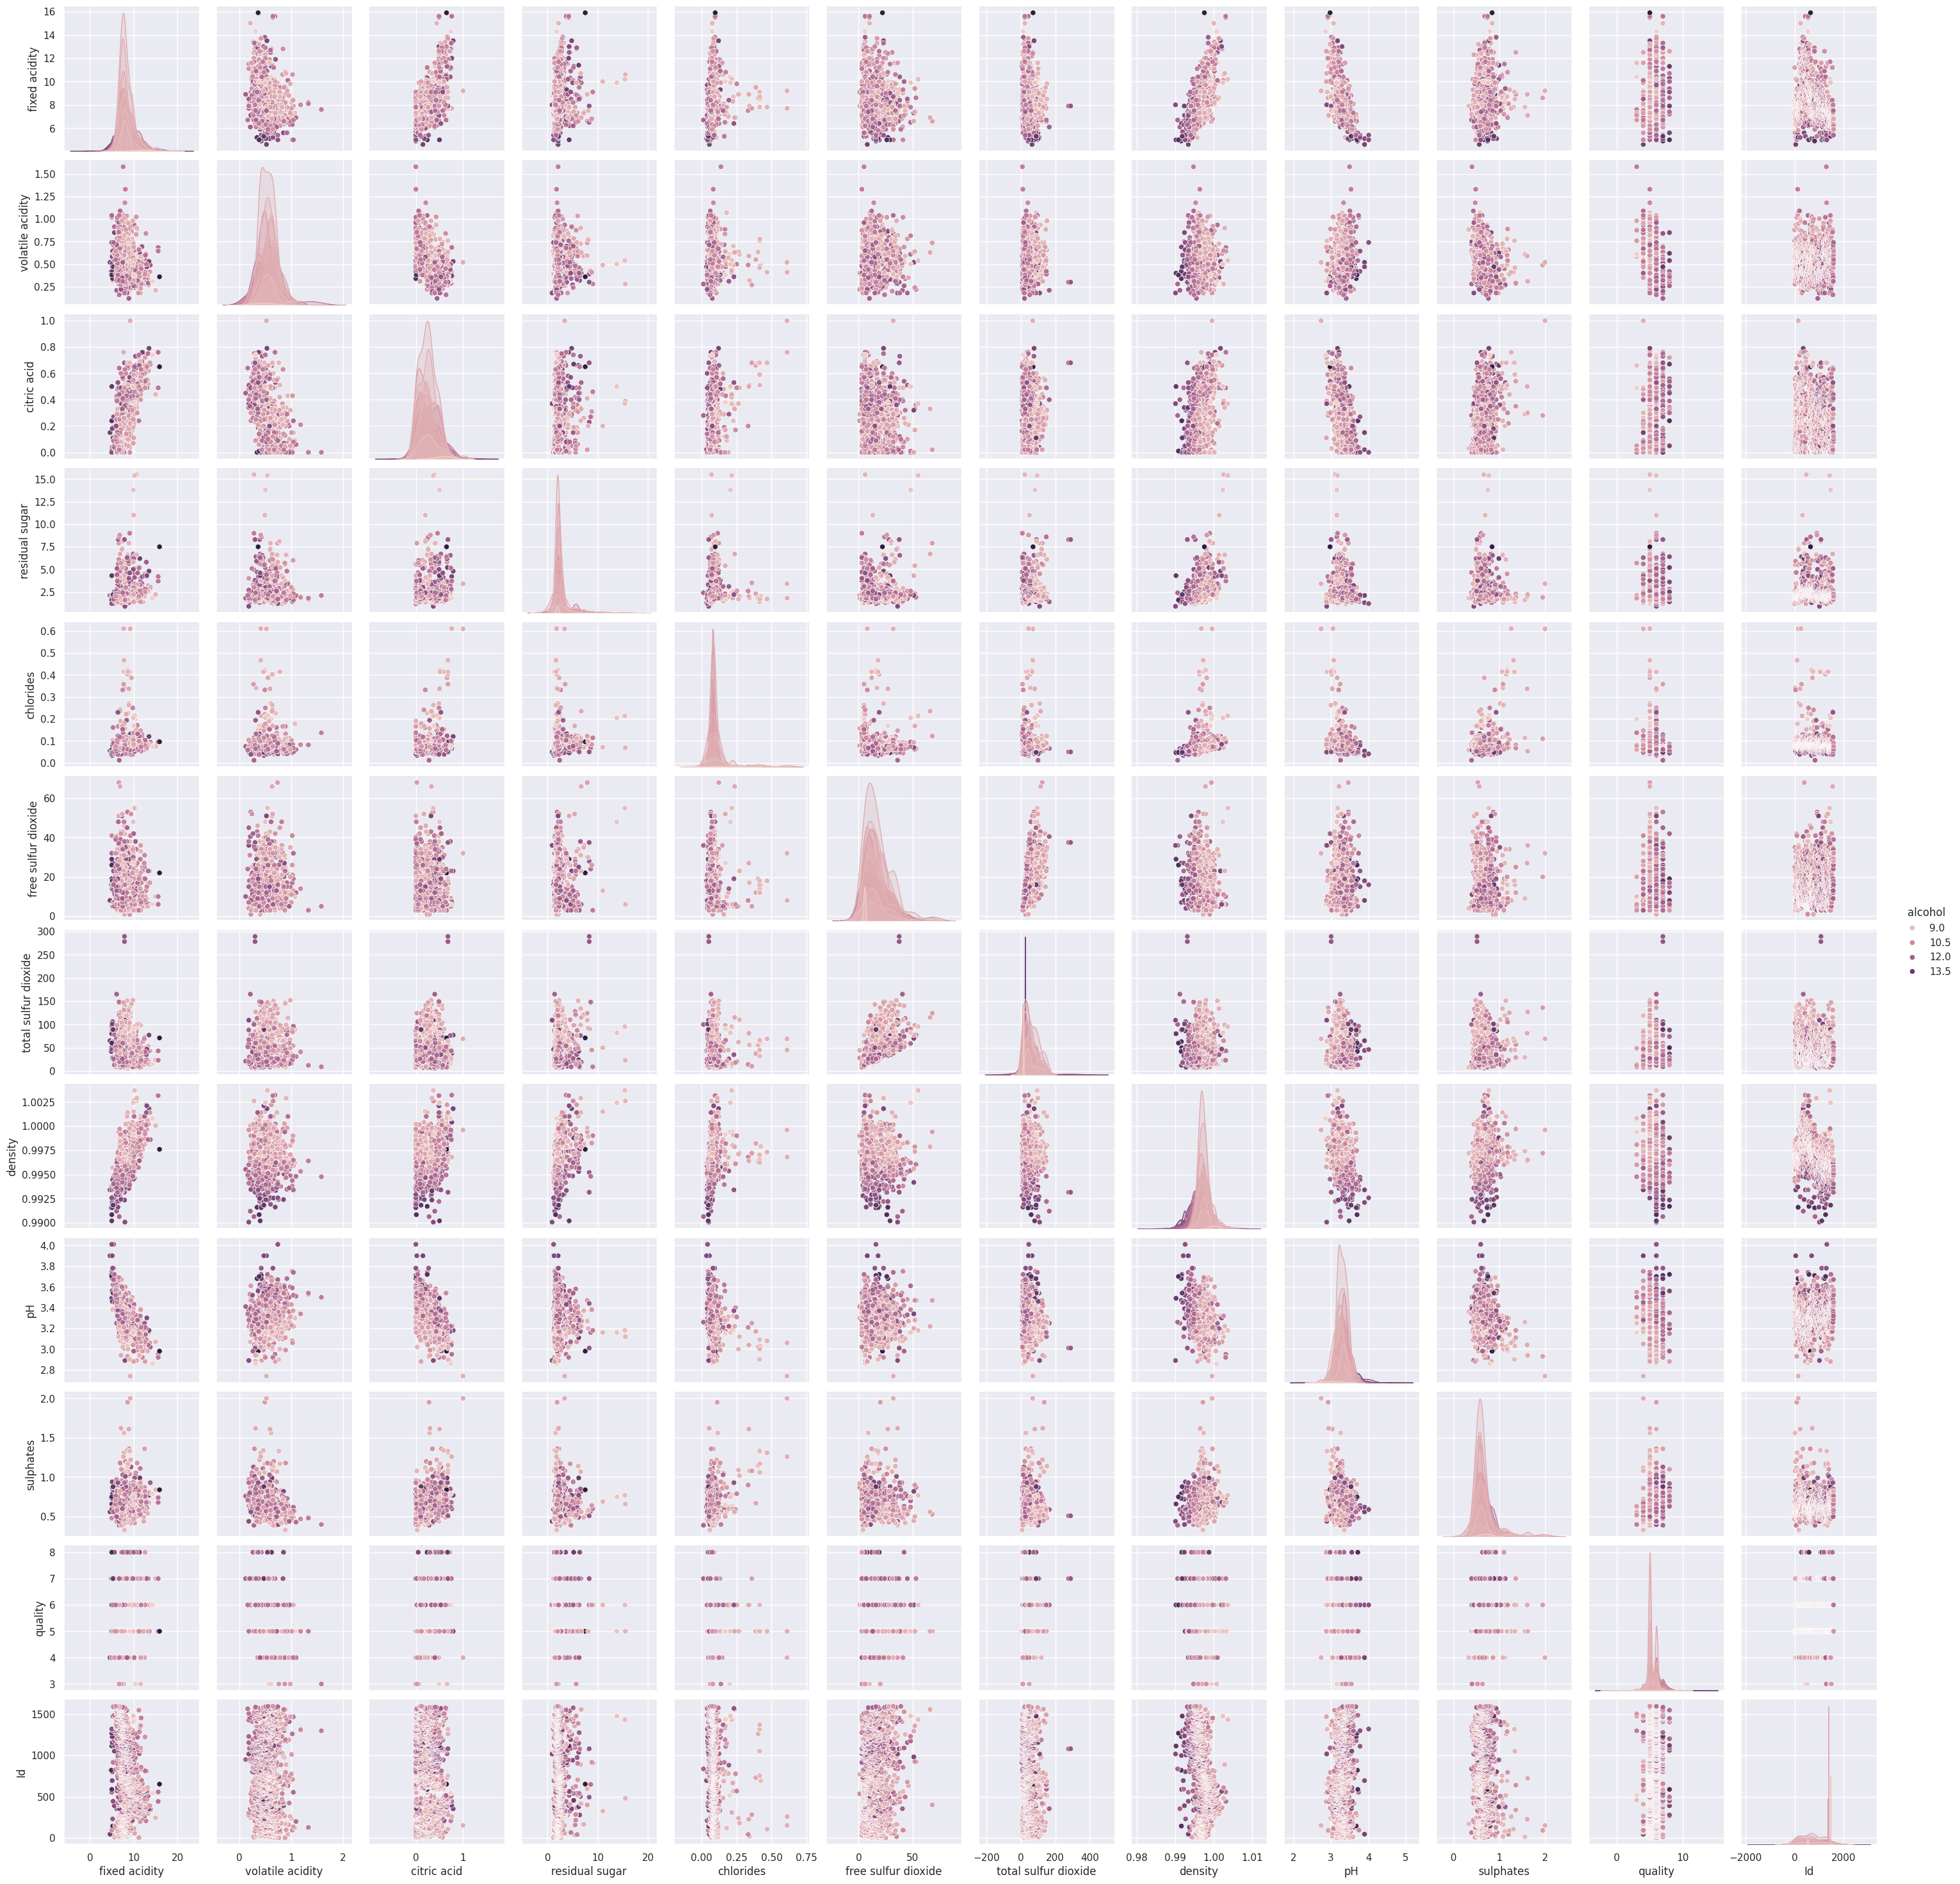

In [ ]:
sns.pairplot(df, hue='alcohol')
plt.show()

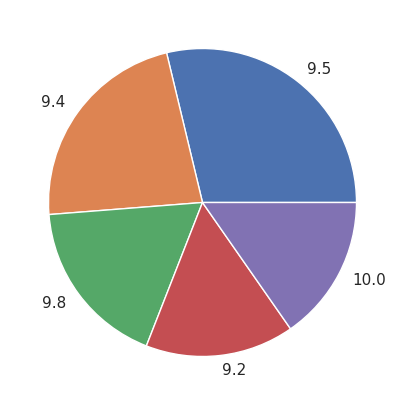

In [ ]:
y = df['alcohol']
top_values = y.value_counts().nlargest(5)  # Top 5 most frequent values
top_values.plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
X = df.drop(columns=['alcohol'])
X.head(10)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 15.0                  65.0   0.9959  3.28       0.54   

   quality  Id  
0        5   0  
1        5   1  
2        5   2  
3        6   3  
4        5   4  
5        5   5  
6        5   6  
7        7   7  
8        7   8  
9        5  10

In [ ]:

X.describe().transpose()

count        mean         std      min        25%  \
fixed acidity         1143.0    8.311111    1.747595  4.60000    7.10000   
volatile acidity      1143.0    0.531339    0.179633  0.12000    0.39250   
citric acid           1143.0    0.268364    0.196686  0.00000    0.09000   
residual sugar        1143.0    2.532152    1.355917  0.90000    1.90000   
chlorides             1143.0    0.086933    0.047267  0.01200    0.07000   
free sulfur dioxide   1143.0   15.615486   10.250486  1.00000    7.00000   
total sulfur dioxide  1143.0   45.914698   32.782130  6.00000   21.00000   
density               1143.0    0.996730    0.001925  0.99007    0.99557   
pH                    1143.0    3.311015    0.156664  2.74000    3.20500   
sulphates             1143.0    0.657708    0.170399  0.33000    0.55000   
quality               1143.0    5.657043    0.805824  3.00000    5.00000   
Id                    1143.0  804.969379  463.997116  0.00000  411.00000   

                            50%          75%         max  
fixed acidity           7.90000     9.100000    15.90000  
volatile acidity        0.52000     0.640000     1.58000  
citric acid             0.25000     0.420000     1.00000  
residual sugar          2.20000     2.600000    15.50000  
chlorides               0.07900     0.090000     0.61100  
free sulfur dioxide    13.00000    21.000000    68.00000  
total sulfur dioxide   37.00000    61.000000   289.00000  
density                 0.99668     0.997845     1.00369  
pH                      3.31000     3.400000     4.01000  
sulphates               0.62000     0.730000     2.00000  
quality                 6.00000     6.000000     8.00000  
Id                    794.00000  1209.500000  1597.00000

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
1      -0.292593          1.941813    -1.365027        0.050060   0.234247   
2      -0.292593          1.273492    -1.161568       -0.171289   0.107253   
3       1.653789         -1.399789     1.483400       -0.466421  -0.252560   
4      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
5      -0.521580          0.716559    -1.365027       -0.540205  -0.252560   
6      -0.235347          0.382399    -1.059838       -0.687771  -0.379553   
7      -0.578826          0.660865    -1.365027       -0.982903  -0.464216   
8      -0.292593          0.271012    -1.263297       -0.392638  -0.294891   
9      -0.922305          0.271012    -0.958109       -0.540205   0.213081   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
1             0.915920              0.643477  0.036165 -0.708928   0.130881   
2            -0.060071              0.246745  0.140103 -0.325775  -0.045254   
3             0.135127              0.429852  0.659792 -0.964363  -0.456235   
4            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
5            -0.255269             -0.180503  0.555854  1.270695  -0.573658   
6            -0.060071              0.399334 -0.171711 -0.070340  -1.160774   
7            -0.060071             -0.760341 -1.107153  0.504389  -1.102062   
8            -0.645665             -0.851895  0.036165  0.312813  -0.514946   
9            -0.060071              0.582441 -0.431556 -0.198057  -0.691081   

    quality        Id  
0 -0.815724 -1.735618  
1 -0.815724 -1.733462  
2 -0.815724 -1.731306  
3  0.425784 -1.729150  
4 -0.815724 -1.726993  
5 -0.815724 -1.724837  
6 -0.815724 -1.722681  
7  1.667293 -1.720525  
8  1.667293 -1.718369  
9 -0.815724 -1.714057

In [ ]:
X.describe().transpose()

count          mean       std       min       25%  \
fixed acidity         1143.0 -3.729883e-16  1.000438 -2.124483 -0.693319   
volatile acidity      1143.0  4.475860e-16  1.000438 -2.290883 -0.773239   
citric acid           1143.0  2.486589e-17  1.000438 -1.365027 -0.907244   
residual sugar        1143.0  1.554118e-16  1.000438 -1.204252 -0.466421   
chlorides             1143.0  8.081413e-17  1.000438 -1.585988 -0.358388   
free sulfur dioxide   1143.0 -5.594825e-17  1.000438 -1.426458 -0.840863   
total sulfur dioxide  1143.0  9.946355e-17  1.000438 -1.218108 -0.760341   
density               1143.0  5.783805e-14  1.000438 -3.461348 -0.603054   
pH                    1143.0 -8.454402e-16  1.000438 -3.646432 -0.676998   
sulphates             1143.0  4.973178e-17  1.000438 -1.924024 -0.632369   
quality               1143.0  2.237930e-16  1.000438 -3.298742 -0.815724   
Id                    1143.0  0.000000e+00  1.000438 -1.735618 -0.849449   

                           50%       75%        max  
fixed acidity        -0.235347  0.451612   4.344377  
volatile acidity     -0.063148  0.605172   5.840349  
citric acid          -0.093408  0.771293   3.721449  
residual sugar       -0.245072  0.050060   9.568078  
chlorides            -0.167898  0.064922  11.092158  
free sulfur dioxide  -0.255269  0.525524   5.112679  
total sulfur dioxide -0.272057  0.460370   7.418423  
density              -0.026198  0.579240   3.616827  
pH                   -0.006481  0.568248   4.463634  
sulphates            -0.221388  0.424439   7.880809  
quality               0.425784  0.425784   2.908801  
Id                   -0.023651  0.872220   1.707720

In [ ]:
observations = list(df.index)
variables = list(df.columns)

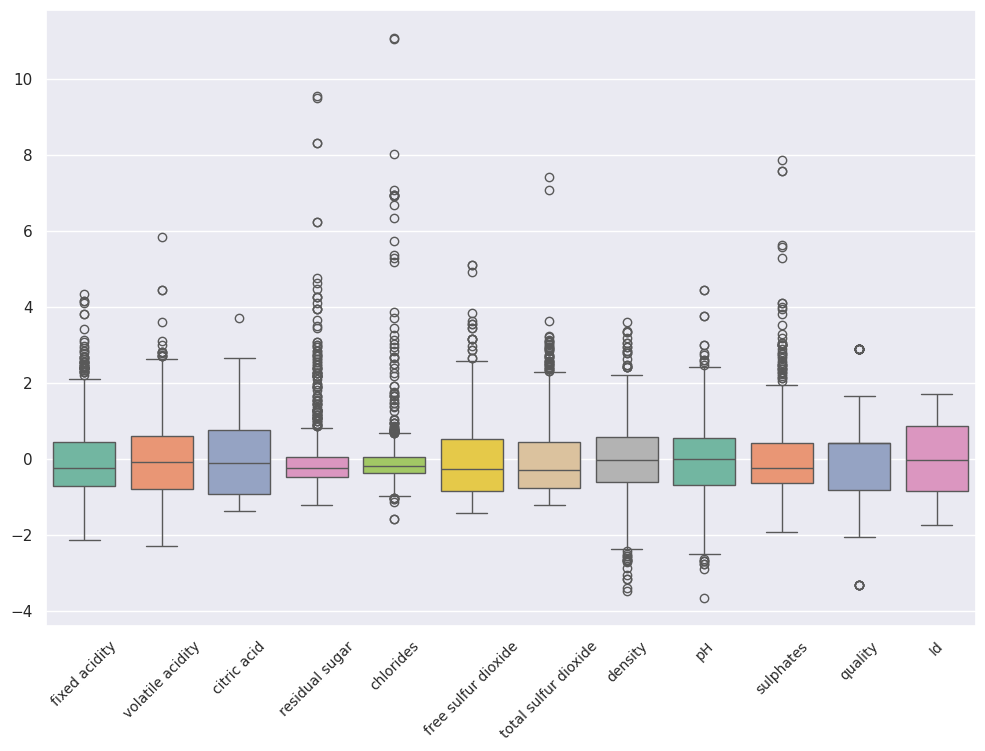

In [ ]:
# Set a larger figure size
plt.figure(figsize=(12, 8))

# Create the boxplot
ax = sns.boxplot(data=X, orient="v", palette="Set2")

# Rotate labels and adjust font size
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)

plt.show()


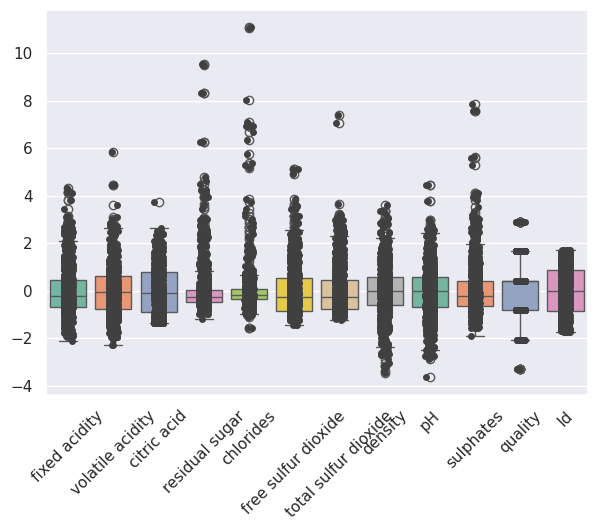

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

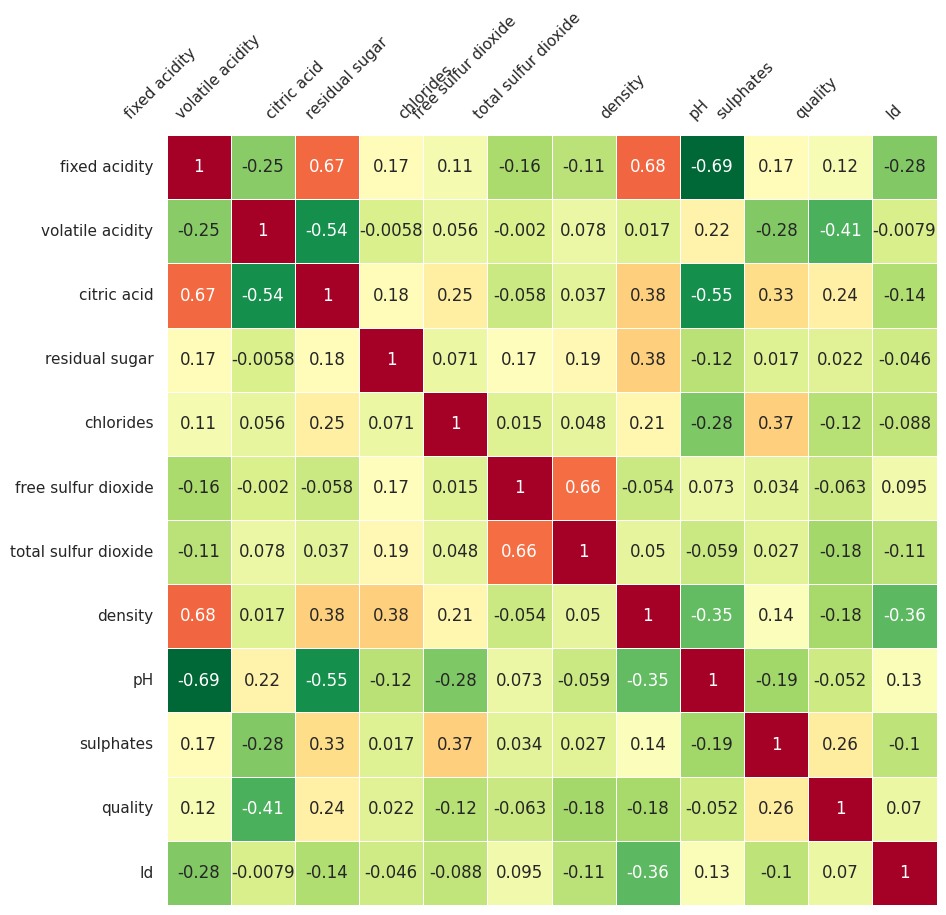

In [ ]:
# Set a larger figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)

# Adjust the ticks and labels
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

[ 8.4         8.5         8.7         8.8         9.          9.1
  9.2         9.23333333  9.25        9.3         9.4         9.5
  9.55        9.6         9.7         9.8         9.9         9.95
 10.         10.03333333 10.1        10.2        10.3        10.4
 10.5        10.55       10.6        10.7        10.8        10.9
 11.         11.06666667 11.1        11.2        11.3        11.4
 11.5        11.6        11.7        11.8        11.9        11.95
 12.         12.1        12.2        12.3        12.4        12.5
 12.6        12.7        12.8        12.9        13.         13.1
 13.2        13.3        13.4        13.56666667 13.6        14.
 14.9       ]


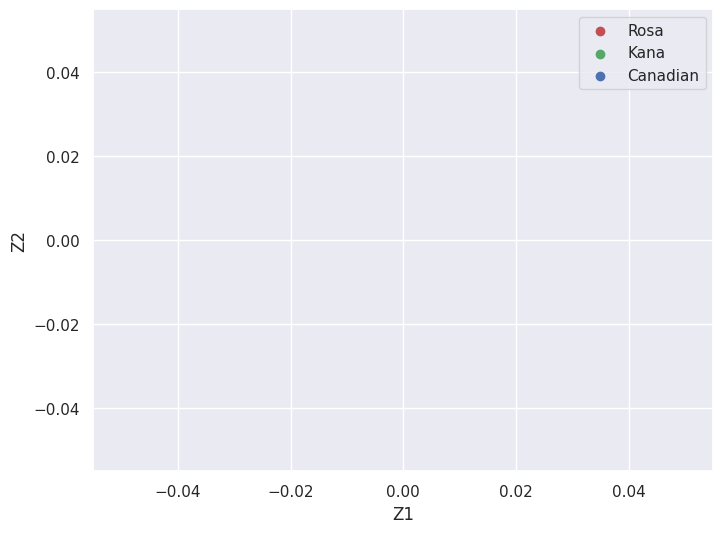

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# Ensure y contains the expected values
print(np.unique(y))

# Corrected indexing for scatter plot
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Z[idx_Rosa[0], 0], Z[idx_Rosa[0], 1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana[0], 0], Z[idx_Kana[0], 1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian[0], 0], Z[idx_Canadian[0], 1], c='b', label='Canadian')

# Add labels, title, and legend
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.legend()

# Show the plot
plt.show()



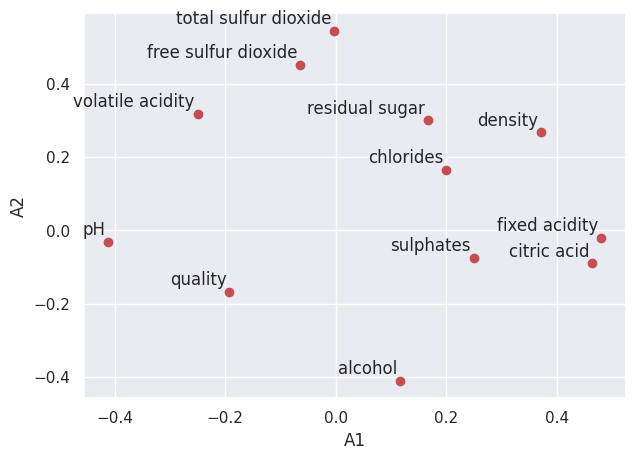

In [ ]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')


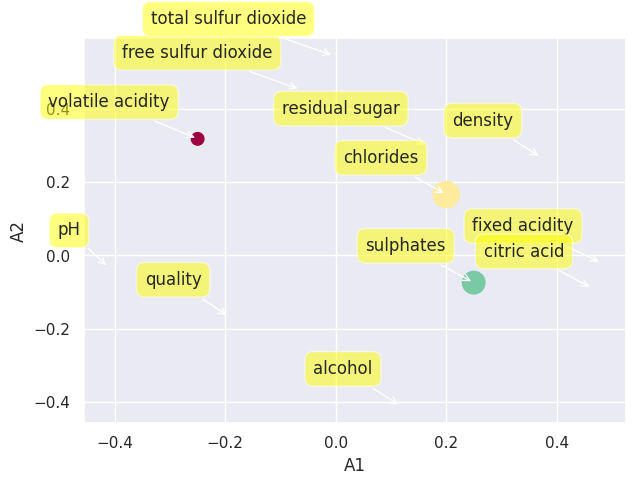

In [ ]:
pca = PCA(n_components=4)  # Specify the number of components you need
Z = pca.fit_transform(X)
A = pca.components_.T

plt.scatter(A[:, 0], A[:, 1], marker='o', c=A[:, 2], s=A[:, 3] * 500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

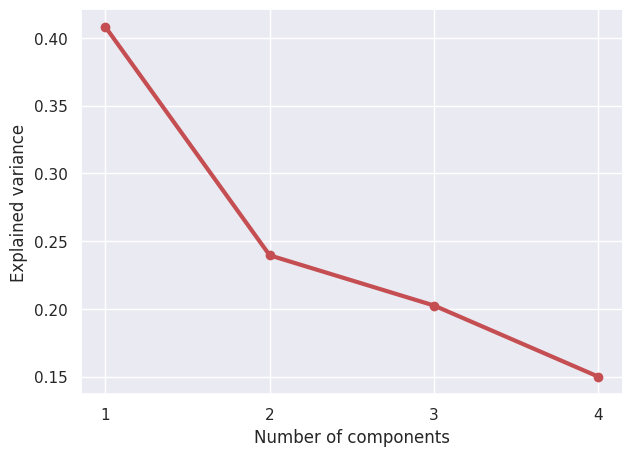

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

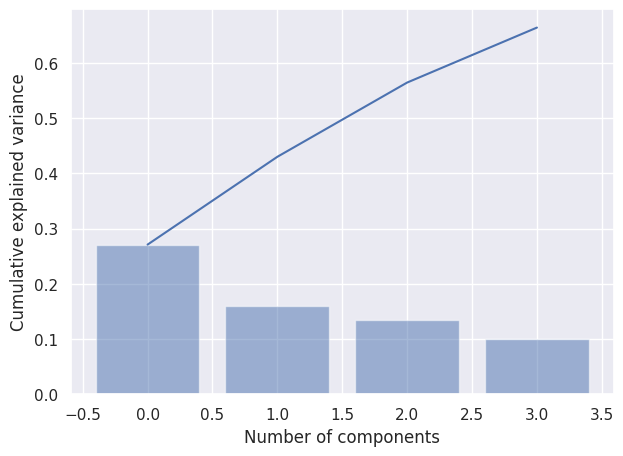

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


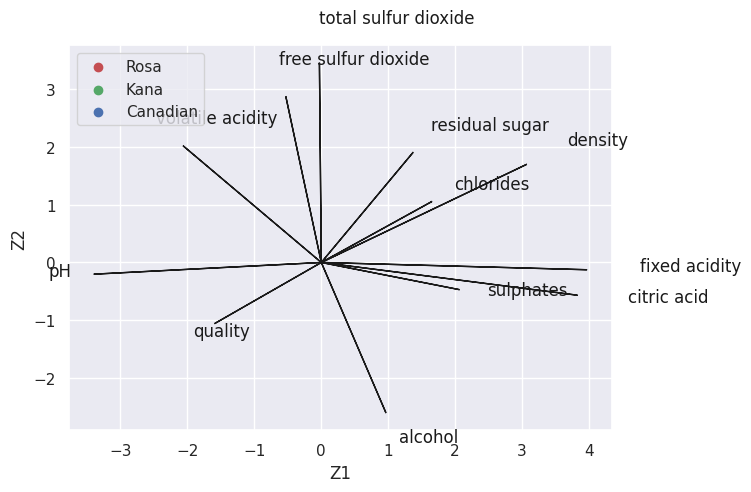

In [ ]:

# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

In [ ]:
# Install specific versions to resolve conflicts
!pip install pandas==2.2.0
!pip install matplotlib==3.7.1
!pip install pycaret==3.3.2 plotnine==0.14.3 ydata-profiling==4.12.1

# Restart runtime if needed
import os
os.kill(os.getpid(), 9)


  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
INFO: pip is looking at multiple versions of plotnine to determine which version is compatible with other requirements. This could take a while.
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
ERROR: Cannot install plotnine==0.14.3 and pycaret==3.3.2 because these package versions have conflicting dependencies.

The conflict is caused by:
    pycaret 3.3.2 depends on matplotlib<3.8.0
    plotnine 0.14.3 depends on matplotlib>=3.8.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
!pip install pca

  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.10.0 which is incompatible.
pycaret 3.3.2 requires pandas<2.2.0, but you have pandas 2.2.0 which is incompatible.
ydata-profiling 4.12.1 requires matplotlib<3.10,>=3.5, but you have matplotlib 3.10.0 which is incompatible.


In [ ]:
import pandas as pd
from pca import pca

# ... (other code) ...

# Load the DataFrame again in this cell
df = pd.read_csv('WineQT.csv')

# Initialize and keep all PCs
model = pca()

# Fit transform
X = df.drop(columns=['alcohol'])  # Re-define X if it was modified or removed.
out = model.fit_transform(X)


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [1] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
out['PC']

PC1
0     804.861655
1     804.084389
2     803.006263
3     802.051220
4     800.861783
...          ...
1138 -787.080916
1139 -788.093567
1140 -789.056690
1141 -790.018386
1142 -792.056904

[1143 rows x 1 columns]

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '1 Principal Components explain [99.97%] of the variance'}, xlabel='PC1 (99.4% expl.var)', ylabel='PC2 (0% expl.var)'>)

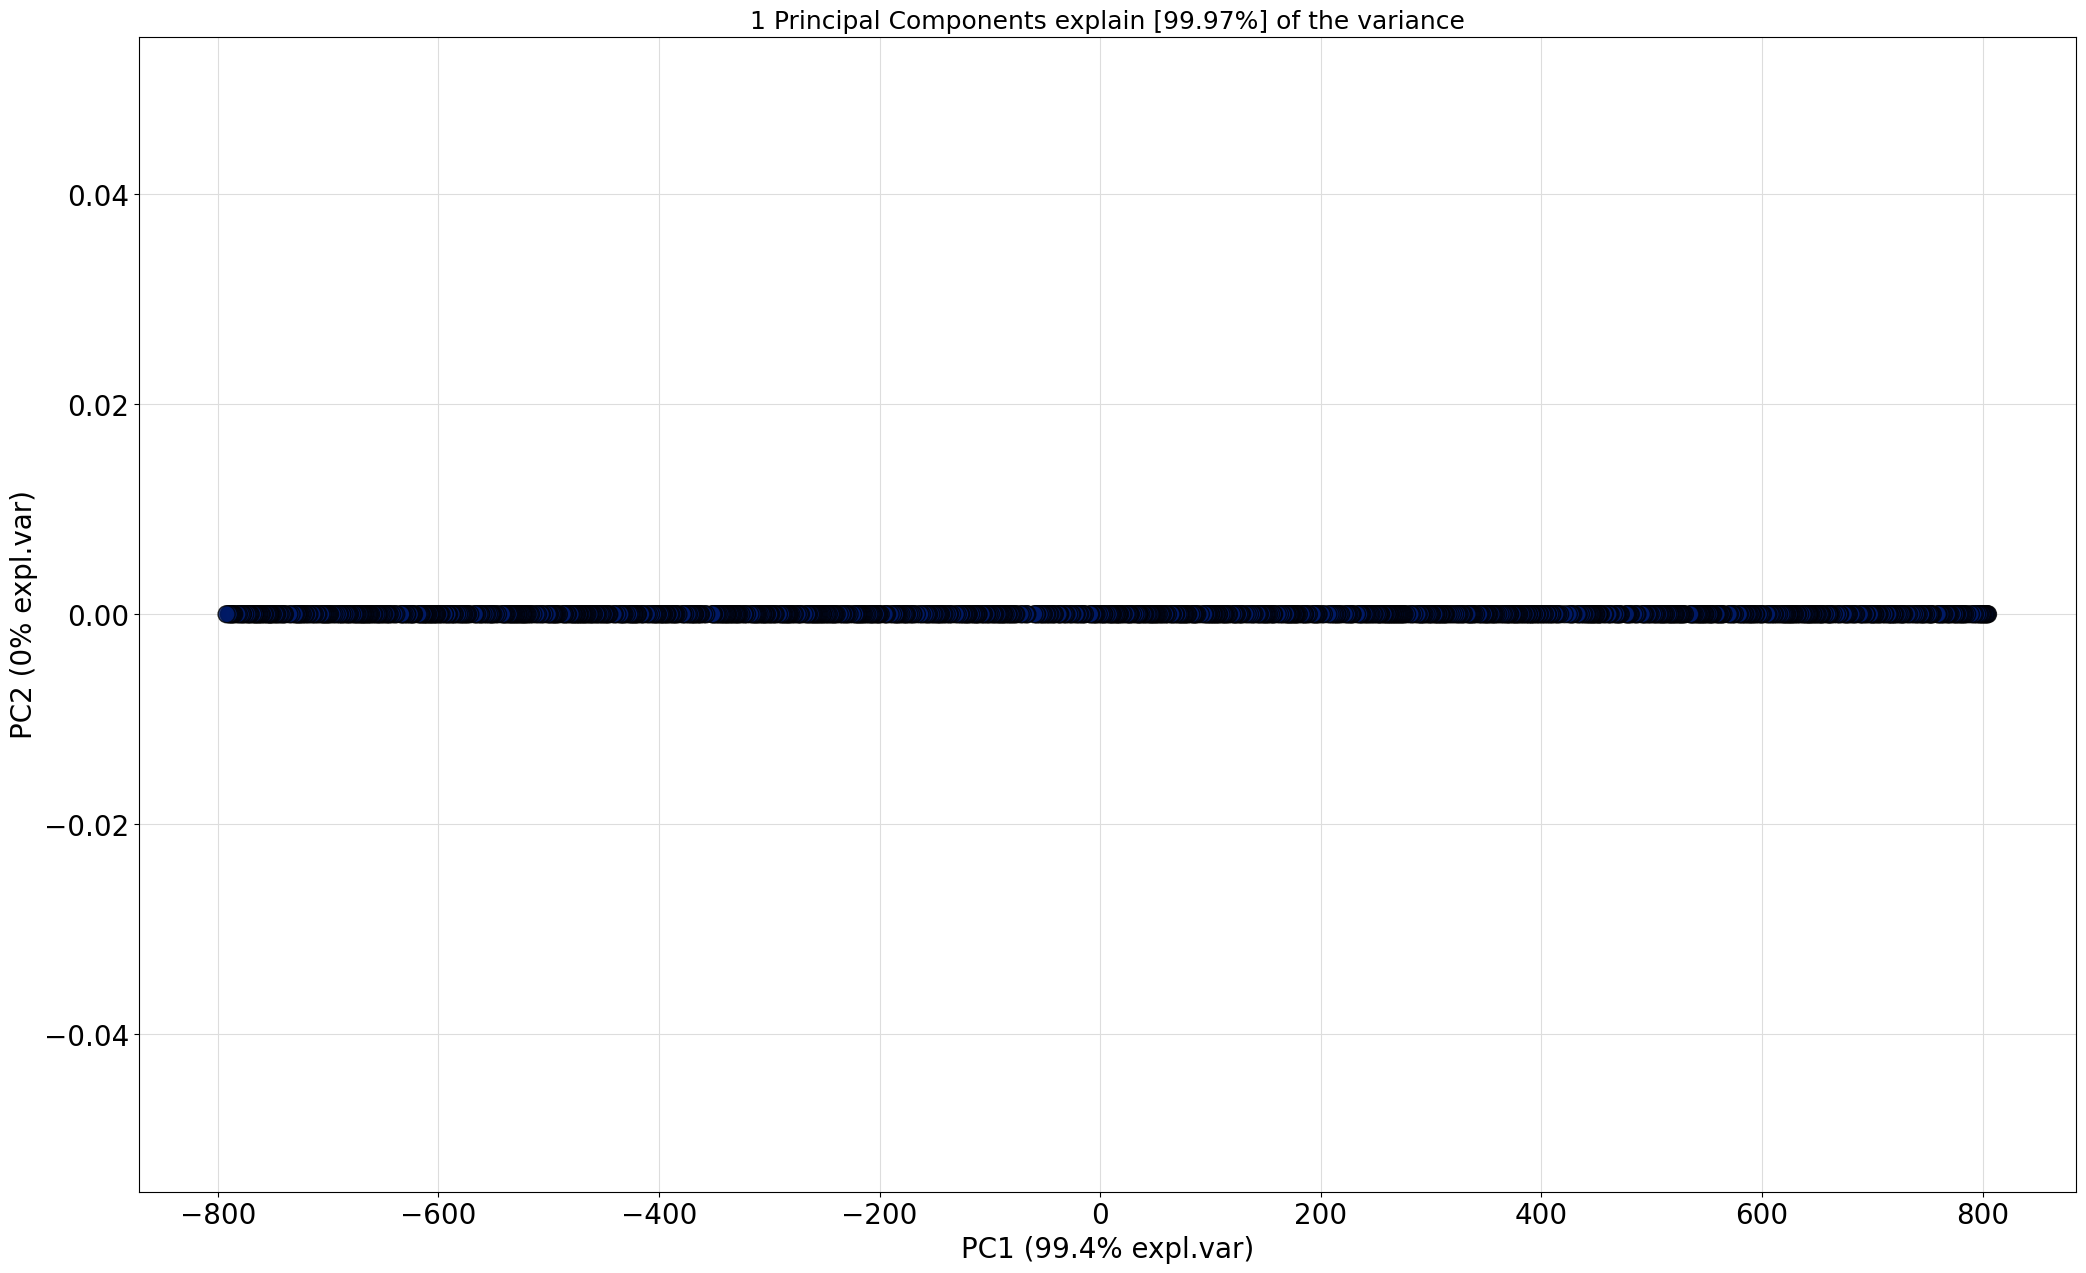

In [ ]:
model.scatter(label=True, legend=False)

In [ ]:
A = out['loadings'].T

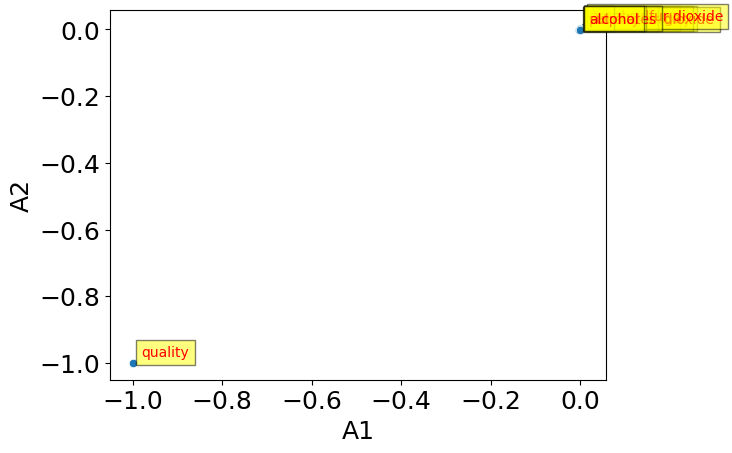

In [ ]:
# Use PC1 for both x and y since there's only one PC
sns.scatterplot(data=A, x=A.columns[0], y=A.columns[0])  # Use the same column for x and y
plt.xlabel('A1')
plt.ylabel('A2')  # You might want to change this label if it's misleading
for i in range(A.shape[0]):
    plt.text(x=A.iloc[i, 0] + 0.02, y=A.iloc[i, 0] + 0.02, s=variables[i],  # Use the same column for y-coordinate of text
             fontdict=dict(color='red', size=10),
             bbox=dict(facecolor='yellow', alpha=0.5))

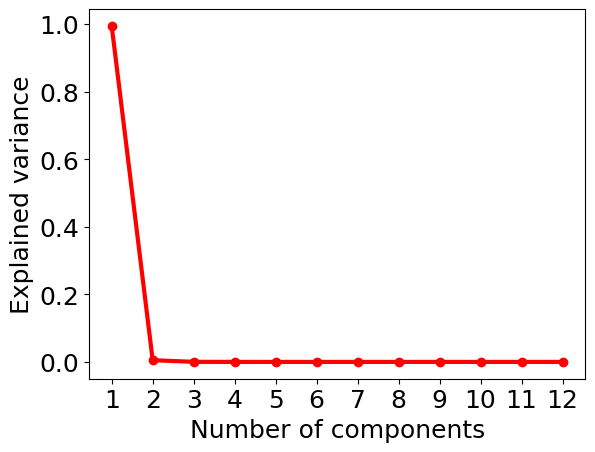

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

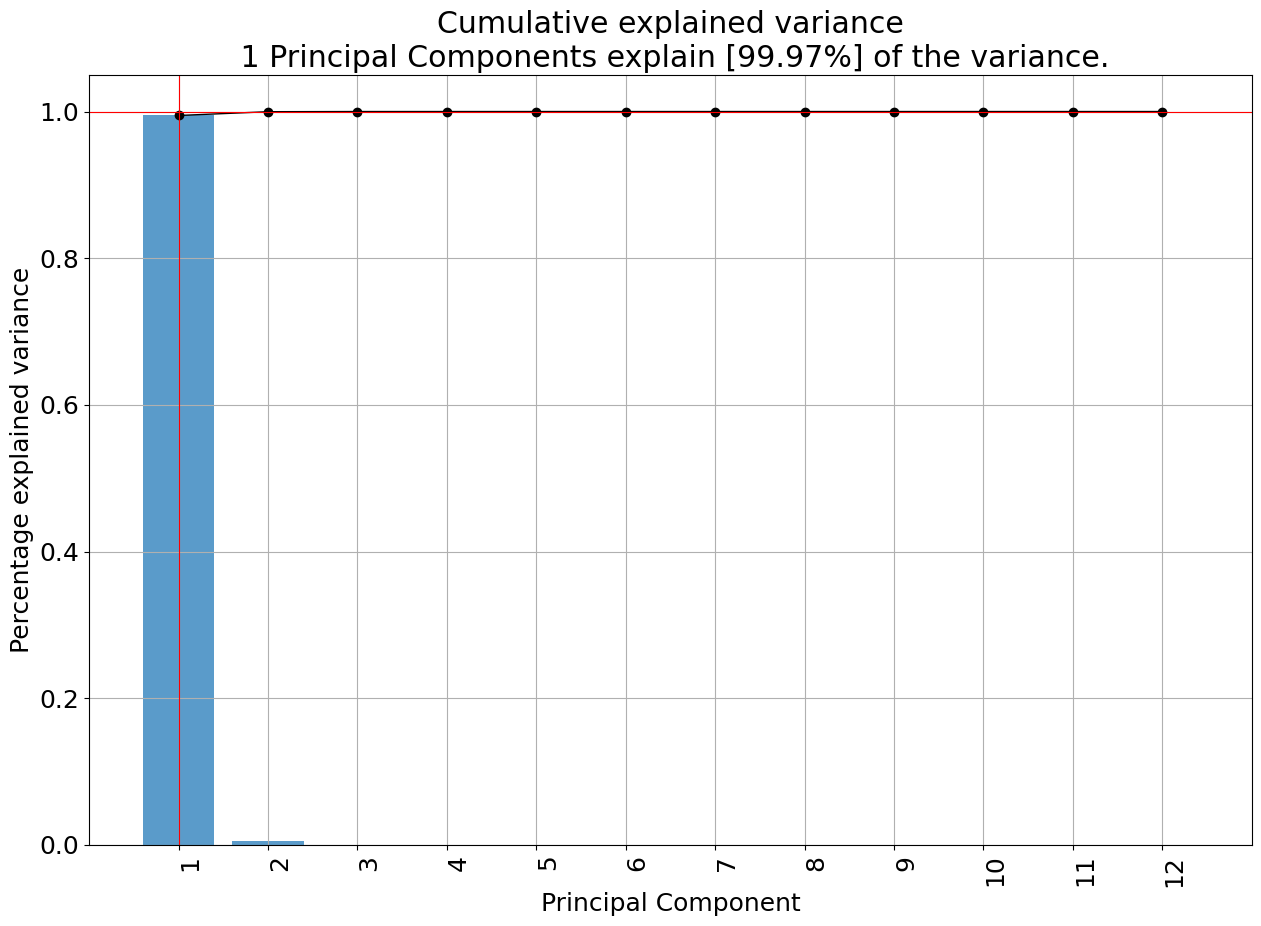

In [ ]:
model.plot();

In [ ]:
model = pca(n_components=2)  # Request at least 2 principal components
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.97%] of the variance'}, xlabel='PC1 (99.4% expl.var)', ylabel='PC2 (0.51% expl.var)'>)

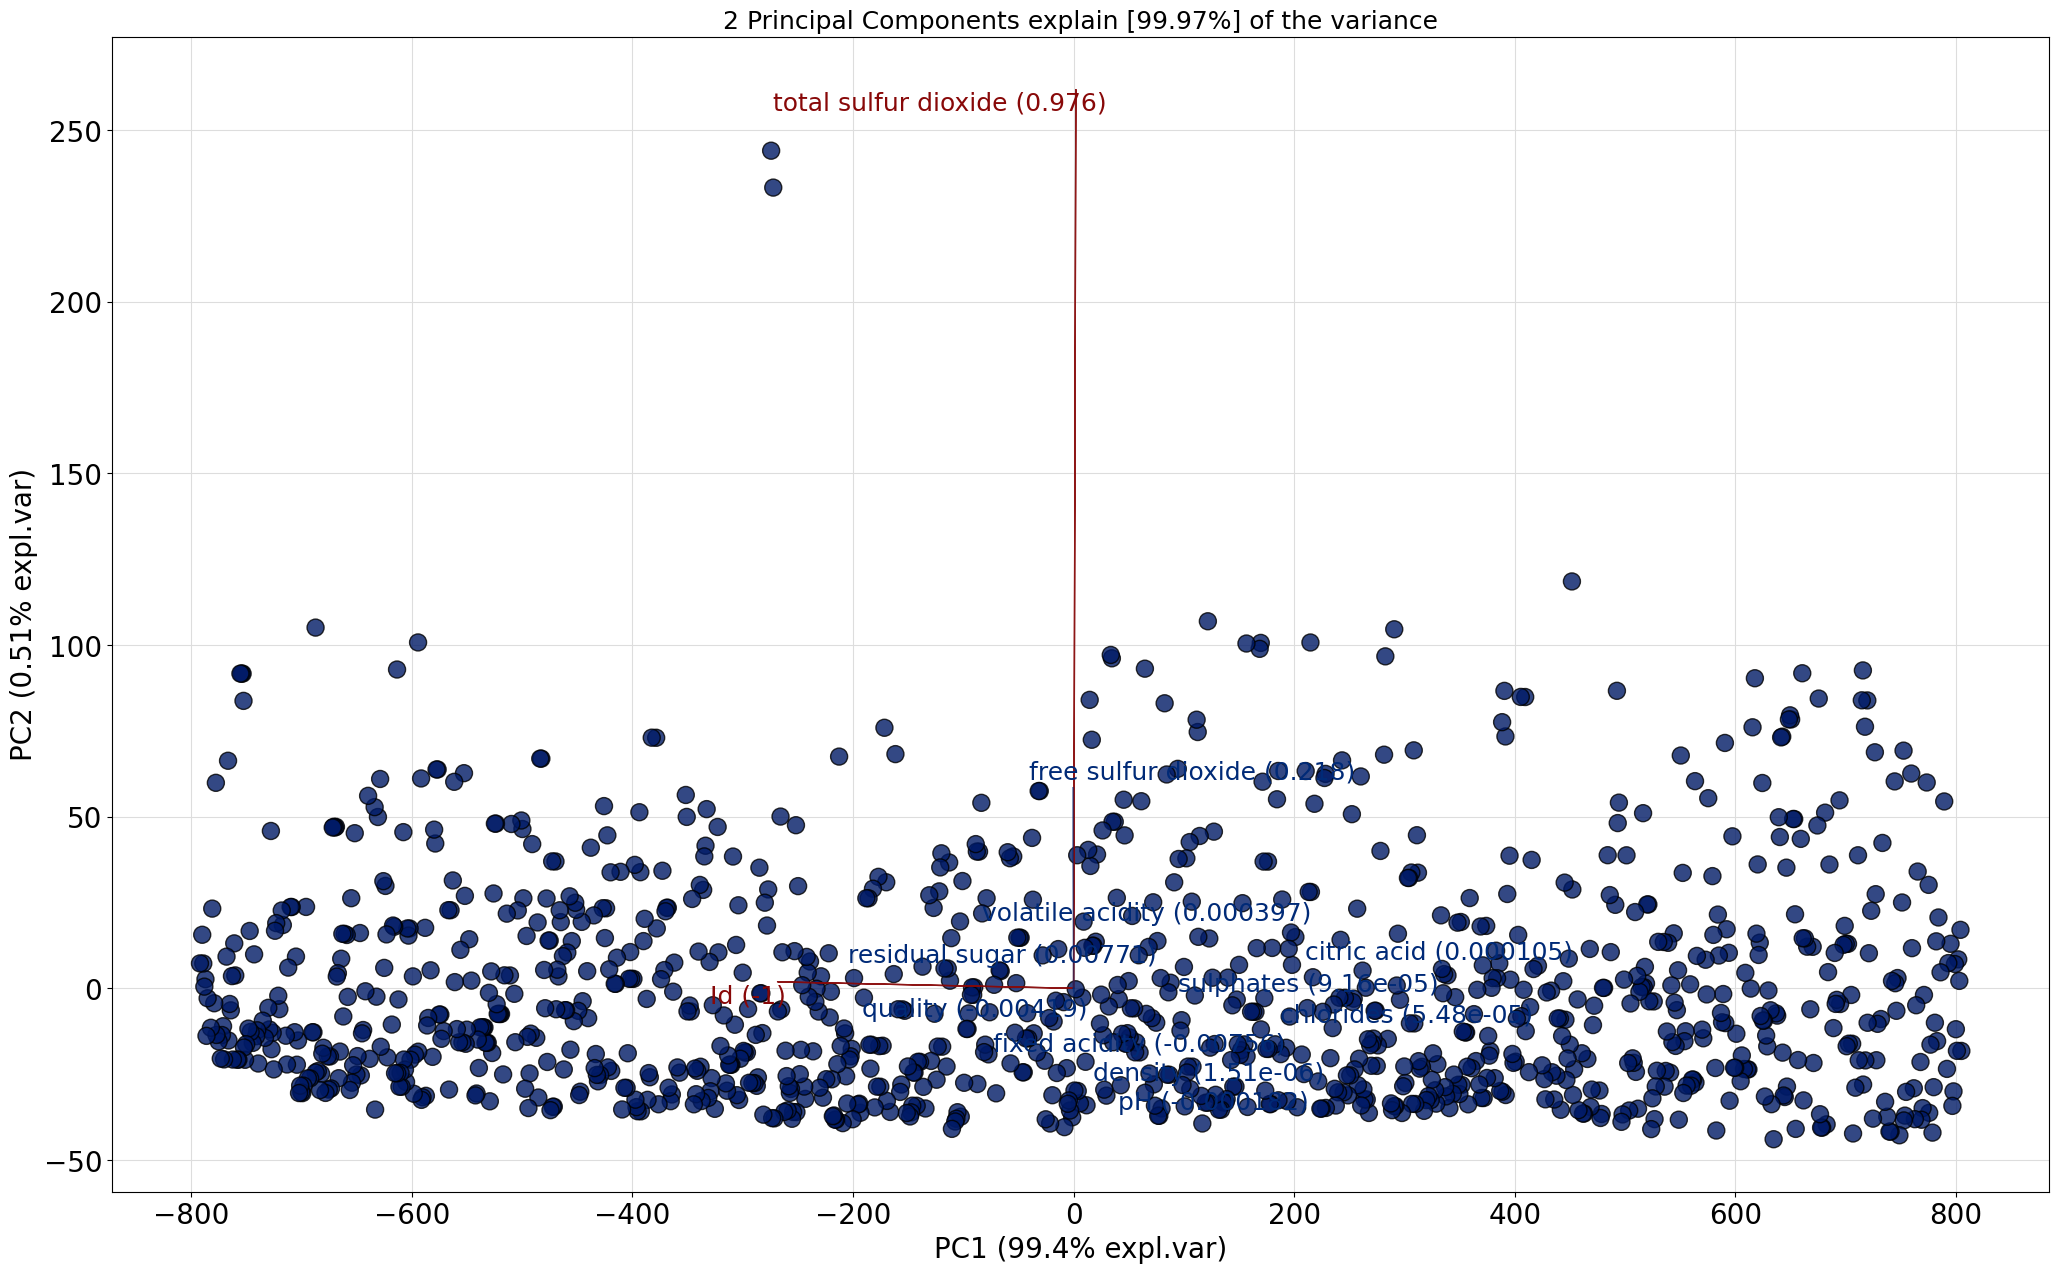

In [ ]:
model.biplot(label=False, legend=False)

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1029, 13)
Unseen Data For Predictions: (114, 13)


In [ ]:
# Get the value counts of the target variable
value_counts = data['alcohol'].value_counts()

# Filter out classes with only one sample
data = data[data['alcohol'].isin(value_counts[value_counts > 1].index)]

# Reset the index if needed
data.reset_index(drop=True, inplace=True)

# Now run the setup again
clf = setup(data=data, target='alcohol', train_size=0.7, session_id=123)

In [ ]:
clf = setup(data=data, target='alcohol', train_size=0.7, session_id=123, data_split_stratify=True)

In [ ]:
# Install necessary libraries
!pip install pycaret[full] ipywidgets

# Import necessary modules
from pycaret.classification import *

# Load your data (assuming it's in a CSV file named 'WineQT.csv')
import pandas as pd
data = pd.read_csv('WineQT.csv')

# Initialize pycaret setup, replace 'target_column' with the actual name of your target column
clf1 = setup(data, target='alcohol', session_id=123) # Assuming 'alcohol' is your target column

# Compare models and get the best one
best_model = compare_models()

# Print the best model details
print(best_model)

# Display model comparison table
models = pull()  # Pulls the model comparison table
print(models)

# Ensure the display of plots
import matplotlib.pyplot as plt
plt.show()

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# Get the value counts of the target variable
value_counts = data['alcohol'].value_counts()

# Filter out classes with only one sample
data = data[data['alcohol'].isin(value_counts[value_counts > 1].index)]

# Reset the index if needed
data.reset_index(drop=True, inplace=True)

# Now run the setup again
clf = setup(data=data, target='alcohol', train_size=0.7, session_id=123, data_split_stratify=True)

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
best_model

[]

In [ ]:
# Instead of using 'classification', import 'regression'
from pycaret.regression import *

# Load your data (assuming it's in a CSV file named 'WineQT.csv')
import pandas as pd
data = pd.read_csv('WineQT.csv')

# Initialize pycaret setup, replace 'target_column' with the actual name of your target column
reg = setup(data, target='alcohol', session_id=123) # Assuming 'alcohol' is your target column

# Compare regression models and get the best one
best_model = compare_models()

# Print the best model details
print(best_model)

# Create a Decision Tree Regressor
dt = create_model('dt')

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:

#trained model object is stored in the variable 'dt'.
dt

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
tuned_dt = tune_model(dt)


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt


DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
# Add the necessary import statements
from ipywidgets import interactive
from ipywidgets import ToggleButtons, Output  # Import ToggleButtons and Output
from IPython.display import display

# ... your existing code ...

# Define a function to handle plot updates
def plot_type_changed(plot_type):
    if plot_type == 'pipeline':
        plot_model(tuned_dt, plot='pipeline')
    elif plot_type == 'tree':
        plot_model(tuned_dt, plot='tree')

# Create the interactive widget
plot_type_buttons = ToggleButtons(
    description='Plot Type:',
    options=[('Pipeline Plot', 'pipeline'), ('Decision Tree', 'tree')],
)

# Connect the widget to the function
interactive_plot = interactive(plot_type_changed, plot_type=plot_type_buttons)

# Display the widget
display(interactive_plot)

interactive(children=(ToggleButtons(description='Plot Type:', options=(('Pipeline Plot', 'pipeline'), ('Decisi…

In [ ]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import numpy as np # import numpy library and alias it as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
from ipywidgets import interactive
from ipywidgets import ToggleButtons, Output  # Import ToggleButtons and Output
from IPython.display import display
from pycaret.classification import plot_model

# ... your existing code ...


# Define a function to handle plot updates
def plot_type_changed(plot_type):
    if plot_type == 'pipeline':
        plot_model(tuned_knn, plot='pipeline')

In [ ]:
lr = create_model('lr')


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, positive=False)

In [ ]:
tuned_lr = tune_model(lr)


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, positive=False)

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

In [ ]:
evaluate_model(tuned_best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Assuming your CSV file is named 'WineQT.csv'
import pandas as pd

# Load the DataFrame before using it in 'setup'
df = pd.read_csv('WineQT.csv')

# Now you can use 'df' in the setup function
clf_pca = setup(data=df, target='alcohol', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best_model_pca

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                    max_depth=None, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, monotonic_cst=None,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [41]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [42]:
tuned_best_model_pca


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                    max_depth=None, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, monotonic_cst=None,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [43]:
evaluate_model(tuned_best_model_pca)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [44]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


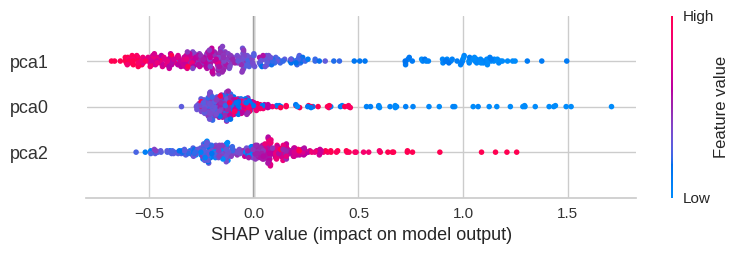

In [46]:
interpret_model(tuned_rf_pca, plot='summary')

In [47]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

In [48]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [49]:
interpret_model(tuned_rf_pca, plot='reason')